<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Univariant Curves for T-logK or P-logK diagrams</h1><br />
</tr>
</table>
</left>

In [1]:
from pychnosz import *
_ = thermo("WORM")

reset: thermodynamic system initialized
The WORM thermodynamic database has been loaded: 1713 aqueous, 1976 total species


As we saw in the `2-Univariant-Curves-T-P.ipynb` demo, we can model the equilibrium between calcite and aragonite and visualize the results with a univariant curve with temperature and pressure axes.

$$\text{calcite} = \text{aragonite}$$

But what if we have specific temperature value(s) and a logK in mind, and we want to solve for the pressure associated with those values?

For example, what if we want the pressures corresponding to logK=0 at 350, 400, 450, and 500 °C?

We can't do that with the the `univariant_TP()` function from the last demo.

Instead, we can use a function called `unicurve()`. The function is set up in a very similar way:

Solving for P at T = 350 °C (logK = 0)...
Root not bracketed at T=350°C: logK range [0.010, 0.080] doesn't include target 0.000
Solving for P at T = 400 °C (logK = 0)...
Solving for P at T = 450 °C (logK = 0)...
  Using warm start: searching 8076 to 9076 bar
Root not bracketed at T=450°C: logK range [-0.031, -0.011] doesn't include target 0.000
  Warm start failed, searching full range...
Solving for P at T = 500 °C (logK = 0)...
  Using warm start: searching 9129 to 10129 bar
Root not bracketed at T=500°C: logK range [-0.030, -0.011] doesn't include target 0.000
  Warm start failed, searching full range...


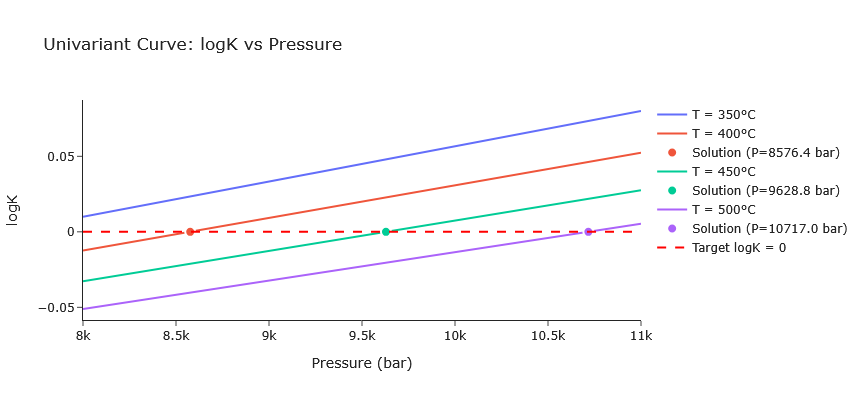


Reaction:


,coeff,name,formula,state,ispecies,model
0,-1,calcite,CaCO3,cr,768,CGL
1,1,aragonite,CaCO3,cr,819,CGL



Results (logK = 0):


,T,P,logK,G,H,S,V,Cp,rho,Warning
0,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Could not converge on P for this T within 8000...
1,400,8576.353229,-0.000000e+00,0.000000e+00,-3863.483233,-5.738840,-2.784,-3.569311,None,NaN
2,450,9628.788840,-0.000000e+00,0.000000e+00,-4317.937544,-5.970483,-2.784,-2.875865,None,NaN
3,500,10716.999484,-1.572992e-14,2.328306e-10,-4745.949319,-6.137964,-2.784,-2.116258,None,NaN


UnivariantResult with 4 points

In [2]:
unicurve(solve="P", # solving for pressure
         logK=0, # desired logK
         species=["calcite", "aragonite"], # chemical species
         state=["cr", "cr"], # aq, gas, liq, cr
         coeff=[-1, 1], # reaction stoichiometry (negative for reactants, positive for products)
         temperatures=[350, 400, 450, 500], # the temperatures used to calculate pressures
         minP=8000, maxP=11000, # the minimum and maximum in a range of pressures to search
         plot_it=True, # visualize results
         messages=True, # print messages
         )

We were able to calculate pressures for 400, 450, and 500 °C for logK=0. These pressures appear in the "P" column in the table above. Note these pressures correspond to the intersection of the three black curves and the red horizontal line at logK=0 in the plot above.

However, the code was unable to find a pressure corresponding to 350 °C in the pressure range we provided. This is represented by the uppermost black curve that does not cross the red line at logK=0. We can try adjusting the minimum pressure in our range to capture an intersection:

Solving for P at T = 350 °C (logK = 0)...
Solving for P at T = 400 °C (logK = 0)...
  Using warm start: searching 7072 to 8072 bar
Root not bracketed at T=400°C: logK range [-0.033, -0.011] doesn't include target 0.000
  Warm start failed, searching full range...
Solving for P at T = 450 °C (logK = 0)...
  Using warm start: searching 8076 to 9076 bar
Root not bracketed at T=450°C: logK range [-0.031, -0.011] doesn't include target 0.000
  Warm start failed, searching full range...
Solving for P at T = 500 °C (logK = 0)...
  Using warm start: searching 9129 to 10129 bar
Root not bracketed at T=500°C: logK range [-0.030, -0.011] doesn't include target 0.000
  Warm start failed, searching full range...


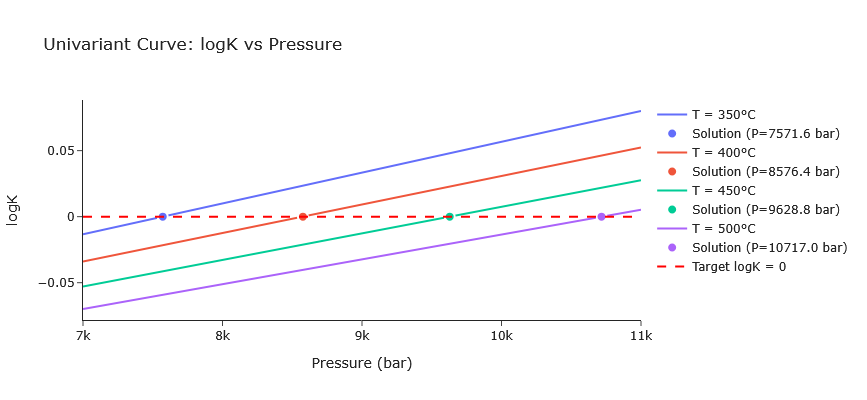


Reaction:


,coeff,name,formula,state,ispecies,model
0,-1,calcite,CaCO3,cr,768,CGL
1,1,aragonite,CaCO3,cr,819,CGL



Results (logK = 0):


,T,P,logK,G,H,S,V,Cp,rho
0,350,7571.584774,1.951631e-14,-2.328306e-10,-3389.723959,-5.439045,-2.784,-4.174529,None
1,400,8576.353229,-0.000000e+00,0.000000e+00,-3863.483233,-5.738840,-2.784,-3.569311,None
2,450,9628.788840,-0.000000e+00,0.000000e+00,-4317.937544,-5.970483,-2.784,-2.875865,None
3,500,10716.999484,-1.572992e-14,2.328306e-10,-4745.949319,-6.137964,-2.784,-2.116258,None


UnivariantResult with 4 points

In [3]:
unicurve(solve="P", # solving for pressure
         logK=0, # desired logK
         species=["calcite", "aragonite"], # chemical species
         state=["cr", "cr"], # aq, gas, liq, cr
         coeff=[-1, 1], # reaction stoichiometry (negative for reactants, positive for products)
         temperatures=[350, 400, 450, 500], # the temperatures used to calculate pressures
         minP=7000, maxP=11000, # the minimum and maximum in a range of pressures to search
         plot_it=True, # visualize results
         messages=True, # print messages
         )

Success! Now we've calculated a pressure for all four of our temperatures at logK=0.

Keep in mind that it might not always be easy to find an appropriate range for a T-P pair using the `unicurve()` function. One approach is to try a calculation with `univariant_TP()` first and set wide ranges for both temperature and pressure. This way you can converge on a T-P range appropriate for your logK of interest, and then go about using `unicurve()` for solving pressures for specific temperatures (and vice versa).

We can also use `unicurve()` to calculate temperature from pressure:

Solving for T at P = 7000 bar (logK = 0)...
Solving for T at P = 8000 bar (logK = 0)...
  Using warm start: searching 300.0 to 370.2°C
Root not bracketed at P=8000 bar: logK range [0.035, 0.001] doesn't include target 0.000
  Warm start failed, searching full range...
Solving for T at P = 9000 bar (logK = 0)...
  Using warm start: searching 321.6 to 421.6°C
Solving for T at P = 10000 bar (logK = 0)...
  Using warm start: searching 370.4 to 470.4°C


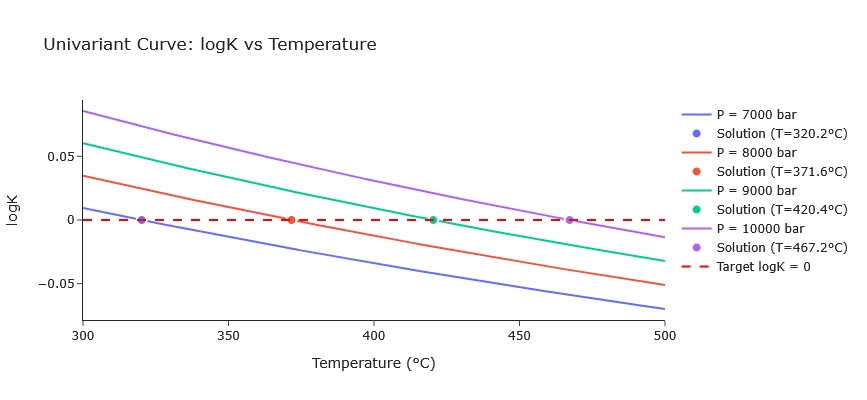


Reaction:


,coeff,name,formula,state,ispecies,model
0,-1,calcite,CaCO3,cr,768,CGL
1,1,aragonite,CaCO3,cr,819,CGL



Results (logK = 0):


,T,P,logK,G,H,S,V,Cp,rho
0,320.170885,7000,2.733873e-09,-0.000031,-3101.380410,-5.226510,-2.784,-4.480914,None
1,371.649084,8000,2.513877e-07,-0.003103,-3596.711511,-5.577436,-2.784,-3.925083,None
2,420.367540,9000,9.268579e-09,-0.000123,-4051.369527,-5.841217,-2.784,-3.296056,None
3,467.214817,10000,5.681950e-08,-0.000805,-4468.610286,-6.035169,-2.784,-2.620906,None


UnivariantResult with 4 points

In [4]:
unicurve(solve="T", # solving for temperature
         logK=0, # desired logK
         species=["calcite", "aragonite"], # chemical species
         state=["cr", "cr"], # aq, gas, liq, cr
         coeff=[-1, 1], # reaction stoichiometry (negative for reactants, positive for products)
         pressures=[7000, 8000, 9000, 10000], # the pressures used to calculate temperature
         minT=300, maxT=500, # the minimum and maximum in a range of temperatures to search
         plot_it=True, # visualize results
         messages=True, # print messages
         )

It is possible to solve for multiple logK values at once:

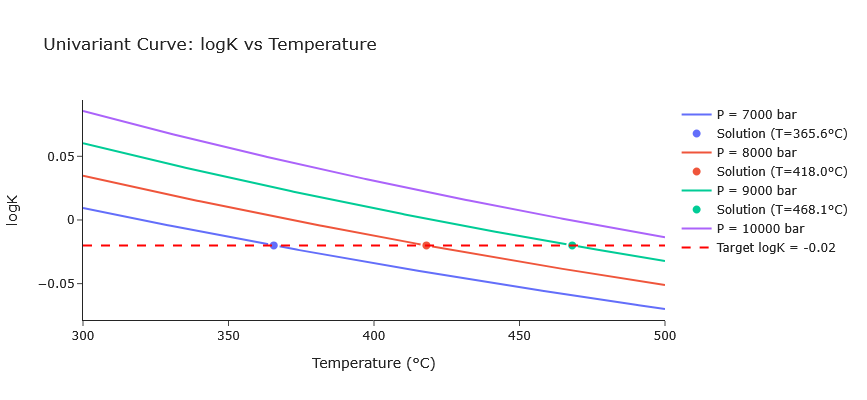


Reaction:


,coeff,name,formula,state,ispecies,model
0,-1,calcite,CaCO3,cr,768,CGL
1,1,aragonite,CaCO3,cr,819,CGL



Results (logK = -0.02):


,T,P,logK,G,H,S,V,Cp,rho,Warning
0,365.559442,7000,-0.02,244.556886,-3294.177717,-5.539846,-2.784,-3.997335,None,NaN
1,418.007092,8000,-0.02,264.635935,-3765.140481,-5.829924,-2.784,-3.328414,None,NaN
2,468.112159,9000,-0.02,283.826882,-4192.545434,-6.038335,-2.784,-2.607415,None,NaN
3,NaN,10000,NaN,NaN,NaN,NaN,NaN,NaN,None,Could not converge on T for this P within 300 ...


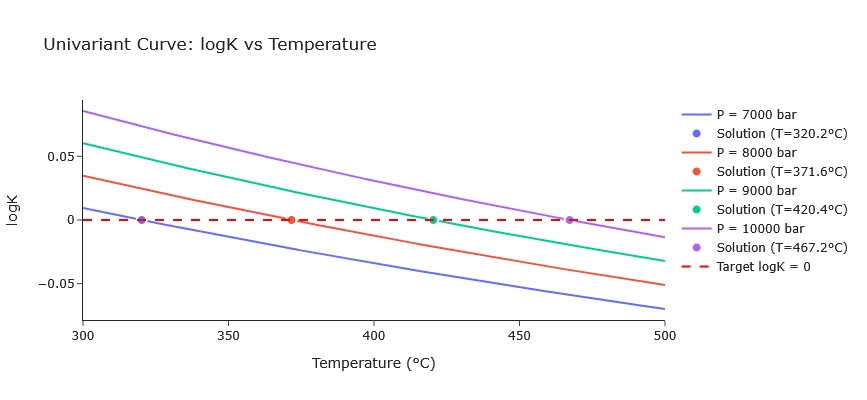


Reaction:


,coeff,name,formula,state,ispecies,model
0,-1,calcite,CaCO3,cr,768,CGL
1,1,aragonite,CaCO3,cr,819,CGL



Results (logK = 0):


,T,P,logK,G,H,S,V,Cp,rho
0,320.170885,7000,2.733873e-09,-0.000031,-3101.380410,-5.226510,-2.784,-4.480914,None
1,371.649084,8000,2.513877e-07,-0.003103,-3596.711511,-5.577436,-2.784,-3.925083,None
2,420.367540,9000,9.268579e-09,-0.000123,-4051.369527,-5.841217,-2.784,-3.296056,None
3,467.214817,10000,5.681950e-08,-0.000805,-4468.610286,-6.035169,-2.784,-2.620906,None


In [5]:
out = unicurve(solve="T", # solving for temperature
               logK=[-0.02, 0], # desired logK values
               species=["calcite", "aragonite"], # chemical species
               state=["cr", "cr"], # aq, gas, liq, cr
               coeff=[-1, 1], # reaction stoichiometry (negative for reactants, positive for products)
               pressures=[7000, 8000, 9000, 10000], # the pressures used to calculate temperature
               minT=300, maxT=500, # the minimum and maximum in a range of temperatures to search
               plot_it=True, # visualize results
               messages=False, # print messages
               )

As seen in previous univariant curve demos, results are stored in a list and can be accessed through indexing:

In [8]:
out[0]["out"]

,T,P,logK,G,H,S,V,Cp,rho,Warning
0,365.559442,7000,-0.02,244.556886,-3294.177717,-5.539846,-2.784,-3.997335,None,NaN
1,418.007092,8000,-0.02,264.635935,-3765.140481,-5.829924,-2.784,-3.328414,None,NaN
2,468.112159,9000,-0.02,283.826882,-4192.545434,-6.038335,-2.784,-2.607415,None,NaN
3,NaN,10000,NaN,NaN,NaN,NaN,NaN,NaN,None,Could not converge on T for this P within 300 ...


End of demo.